# Load and visualize data

In [ ]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math

In [ ]:
df = pd.read_csv('DATA.csv', parse_dates=['Date'])

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,NASDAQ,NYSE,S&P 500,FTSE100,...,RUSSELL2000,HENG SENG,SSE,Crude Oil,Gold,VIX,USD index,Amazon,Google,Microsoft
0,2010-07-01,9.082143,9.100000,8.686429,8.874286,1022896000,2101.360107,6462.029785,1027.369995,4805.75,...,604.760010,NaN,2373.791992,72.949997,1206.300049,32.860001,84.72,110.959999,110.959999,23.160000
1,2010-07-02,8.946072,8.961785,8.685715,8.819285,693842800,2091.790039,6434.810059,1022.580017,4838.09,...,598.969971,19905.32031,2382.900879,72.139999,1207.400024,30.120001,84.43,109.139999,109.139999,23.270000
2,2010-07-06,8.964286,9.028571,8.791429,8.879642,615235600,2093.879883,6486.089844,1028.060059,4965.00,...,590.030029,20084.11914,2409.424072,71.980003,1194.800049,29.650000,84.08,110.059998,110.059998,23.820000
3,2010-07-07,8.946072,9.241786,8.919642,9.238214,654556000,2159.469971,6685.779785,1060.270020,5014.82,...,611.659973,19857.07031,2421.116943,74.070000,1198.599976,26.840000,83.82,113.430000,113.430000,24.299999
4,2010-07-08,9.374286,9.389286,9.103214,9.217500,738144400,2175.399902,6755.810059,1070.250000,5105.45,...,620.270020,20050.56055,2415.149902,75.440002,1195.800049,25.709999,83.82,116.220001,116.220001,24.410000


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Volume,NASDAQ,NYSE,S&P 500,FTSE100,...,RUSSELL2000,HENG SENG,SSE,Crude Oil,Gold,VIX,USD index,Amazon,Google,Microsoft
2512,2020-06-24,91.250000,92.197502,89.629997,90.014999,192623200,9909.169922,11726.54004,3050.330078,6123.69,...,1389.739990,24781.58008,2979.551025,38.009998,1765.800049,33.840000,97.15,2734.399902,2734.399902,197.839996
2513,2020-06-25,90.175003,91.250000,89.392502,91.209999,137522400,10017.000000,11865.11035,3083.760010,6147.14,...,1413.310059,NaN,NaN,38.720001,1762.099976,32.220001,97.43,2754.580078,2754.580078,200.339996
2514,2020-06-26,91.102501,91.330002,88.254997,88.407501,205256800,9757.219727,11604.42969,3009.050049,6159.30,...,1378.780029,24549.99023,NaN,38.490002,1772.500000,34.730000,97.43,2692.870117,2692.870117,196.330002
2515,2020-06-29,88.312500,90.542503,87.820000,90.445000,130646000,9874.150391,11777.08008,3053.239990,6225.77,...,1421.209961,24301.27930,2961.516113,39.700001,1774.800049,31.780001,97.54,2680.379883,2680.379883,198.440002
2516,2020-06-30,90.019997,91.495003,90.000000,91.199997,140223200,10058.769530,11893.78027,3100.290039,6169.74,...,1441.369995,24427.18945,2984.674072,39.270000,1793.000000,30.430000,97.39,2758.820068,2758.820068,203.509995


In [ ]:
df.shape

(2517, 22)

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'NASDAQ ', 'NYSE ',
       'S&P 500', 'FTSE100', 'NIKKI225', 'BSE SENSEX', 'RUSSELL2000',
       'HENG SENG', 'SSE', 'Crude Oil', 'Gold', 'VIX', 'USD index', 'Amazon',
       'Google', 'Microsoft'],
      dtype='object')

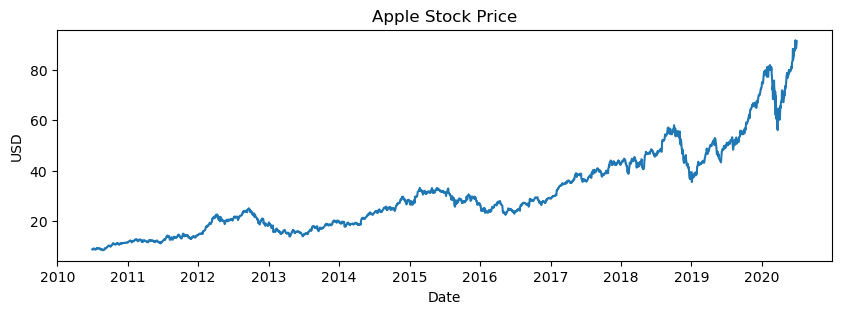

In [ ]:
fig, ax = plt.subplots(figsize =(10,3))
ax.plot(df['Date'], df['Close'], label="Apple Stock")
ax.set(xlabel="Date", ylabel="USD", title="Apple Stock Price")
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
plt.show()

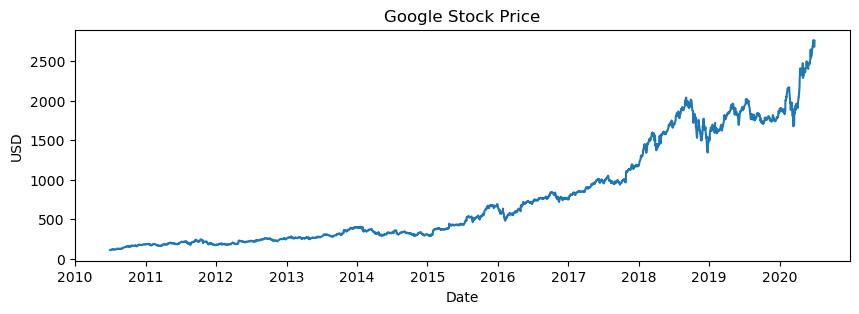

In [ ]:
fig, ax = plt.subplots(figsize =(10,3))
ax.plot(df['Date'], df['Google'], label="Apple Stock")
ax.set(xlabel="Date", ylabel="USD", title="Google Stock Price")
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
plt.show()

In [ ]:
def get_technical_indicators(data):
    # Create 7 and 21 days Moving Average
    data['MA7'] = data.iloc[:,4].rolling(window=7).mean()
    data['MA21'] = data.iloc[:,4].rolling(window=21).mean()

    # Create MACD
    data['MACD'] = data.iloc[:,4].ewm(span=26).mean() - data.iloc[:,1].ewm(span=12,adjust=False).mean()

    # Create Bollinger Bands
    data['20SD'] = data.iloc[:, 4].rolling(20).std()
    data['upper_band'] = data['MA21'] + (data['20SD'] * 2)
    data['lower_band'] = data['MA21'] - (data['20SD'] * 2)

    # Create Exponential moving average
    data['EMA'] = data.iloc[:,4].ewm(com=0.5).mean()

    # Create LogMomentum
    data['logmomentum'] = np.log(data.iloc[:,4] - 1)

    return data

In [ ]:
T_df = get_technical_indicators(df)

In [ ]:
T_df.head()

,Date,Open,High,Low,Close,Volume,NASDAQ,NYSE,S&P 500,FTSE100,...,Google,Microsoft,MA7,MA21,MACD,20SD,upper_band,lower_band,EMA,logmomentum
0,2010-07-01,9.082143,9.100000,8.686429,8.874286,1022896000,2101.360107,6462.029785,1027.369995,4805.75,...,110.959999,23.160000,NaN,NaN,-0.207857,NaN,NaN,NaN,8.874286,2.063603
1,2010-07-02,8.946072,8.961785,8.685715,8.819285,693842800,2091.790039,6434.810059,1022.580017,4838.09,...,109.139999,23.270000,NaN,NaN,-0.215481,NaN,NaN,NaN,8.833035,2.056593
2,2010-07-06,8.964286,9.028571,8.791429,8.879642,615235600,2093.879883,6486.089844,1028.060059,4965.00,...,110.059998,23.820000,NaN,NaN,-0.188385,NaN,NaN,NaN,8.865301,2.064282
3,2010-07-07,8.946072,9.241786,8.919642,9.238214,654556000,2159.469971,6685.779785,1060.270020,5014.82,...,113.430000,24.299999,NaN,NaN,-0.066650,NaN,NaN,NaN,9.117017,2.108784
4,2010-07-08,9.374286,9.389286,9.103214,9.217500,738144400,2175.399902,6755.810059,1070.250000,5105.45,...,116.220001,24.410000,NaN,NaN,-0.060747,NaN,NaN,NaN,9.184283,2.106266


In [ ]:
dataset = T_df.iloc[20:,:].reset_index(drop=True)
dataset.head()

,Date,Open,High,Low,Close,Volume,NASDAQ,NYSE,S&P 500,FTSE100,...,Google,Microsoft,MA7,MA21,MACD,20SD,upper_band,lower_band,EMA,logmomentum
0,2010-07-30,9.138928,9.275000,9.103572,9.187500,448210000,2254.699951,6998.990234,1101.599976,5258.02,...,117.889999,25.809999,9.278775,9.105357,-0.050225,0.182885,9.471127,8.739587,9.211011,2.102609
1,2010-08-02,9.301429,9.378214,9.272142,9.351786,428055600,2295.360107,7174.899902,1125.859985,5397.11,...,120.070000,26.330000,9.293214,9.128095,-0.047484,0.175904,9.479903,8.776288,9.304861,2.122475
2,2010-08-03,9.321786,9.402143,9.265000,9.354643,417653600,2283.520020,7146.990234,1120.459961,5396.48,...,122.419998,26.160000,9.303367,9.153588,-0.047158,0.170378,9.494345,8.812832,9.338049,2.122817
3,2010-08-04,9.387143,9.438571,9.296785,9.392143,420375200,2303.570068,7182.140137,1127.239990,5386.16,...,127.580002,25.730000,9.322245,9.177993,-0.052793,0.177095,9.532183,8.823803,9.374112,2.127296
4,2010-08-05,9.347500,9.399285,9.305357,9.346429,289097200,2293.060059,7174.270020,1125.810059,5365.78,...,127.830002,25.370001,9.310102,9.183146,-0.054453,0.181027,9.545201,8.821092,9.355657,2.121834


In [ ]:
def get_fourier_transfer(dataset):
    # Get the columns for doing fourier
    data_FT = dataset[['Date', 'Close']]

    close_fft = np.fft.fft(np.asarray(data_FT['Close'].tolist()))
    fft_df = pd.DataFrame({'fft': close_fft})
    fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
    fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

    fft_list = np.asarray(fft_df['fft'].tolist())
    fft_com_df = pd.DataFrame()
    for num_ in [3, 6, 9]:
        fft_list_m10 = np.copy(fft_list);
        fft_list_m10[num_:-num_] = 0
        fft_ = np.fft.ifft(fft_list_m10)
        fft_com = pd.DataFrame({'fft': fft_})
        fft_com['absolute of ' + str(num_) + ' comp'] = fft_com['fft'].apply(lambda x: np.abs(x))
        fft_com['angle of ' + str(num_) + ' comp'] = fft_com['fft'].apply(lambda x: np.angle(x))
        fft_com = fft_com.drop(columns='fft')
        fft_com_df = pd.concat([fft_com_df, fft_com], axis=1)

    return fft_com_df

In [ ]:
dataset_F = get_fourier_transfer(dataset)
dataset_F.head()

,absolute of 3 comp,angle of 3 comp,absolute of 6 comp,angle of 6 comp,absolute of 9 comp,angle of 9 comp
0,39.394969,-0.057979,45.061101,-0.046991,43.584984,-0.024837
1,39.295065,-0.058099,44.783613,-0.047516,43.114605,-0.025025
2,39.195068,-0.058217,44.505289,-0.048036,42.644095,-0.025205
3,39.094981,-0.058333,44.226155,-0.048554,42.173551,-0.025375
4,38.994805,-0.058446,43.946237,-0.049067,41.703066,-0.025536


In [ ]:
Final_data = pd.concat([dataset, dataset_F], axis=1)
Final_data.head()

,Date,Open,High,Low,Close,Volume,NASDAQ,NYSE,S&P 500,FTSE100,...,upper_band,lower_band,EMA,logmomentum,absolute of 3 comp,angle of 3 comp,absolute of 6 comp,angle of 6 comp,absolute of 9 comp,angle of 9 comp
0,2010-07-30,9.138928,9.275000,9.103572,9.187500,448210000,2254.699951,6998.990234,1101.599976,5258.02,...,9.471127,8.739587,9.211011,2.102609,39.394969,-0.057979,45.061101,-0.046991,43.584984,-0.024837
1,2010-08-02,9.301429,9.378214,9.272142,9.351786,428055600,2295.360107,7174.899902,1125.859985,5397.11,...,9.479903,8.776288,9.304861,2.122475,39.295065,-0.058099,44.783613,-0.047516,43.114605,-0.025025
2,2010-08-03,9.321786,9.402143,9.265000,9.354643,417653600,2283.520020,7146.990234,1120.459961,5396.48,...,9.494345,8.812832,9.338049,2.122817,39.195068,-0.058217,44.505289,-0.048036,42.644095,-0.025205
3,2010-08-04,9.387143,9.438571,9.296785,9.392143,420375200,2303.570068,7182.140137,1127.239990,5386.16,...,9.532183,8.823803,9.374112,2.127296,39.094981,-0.058333,44.226155,-0.048554,42.173551,-0.025375
4,2010-08-05,9.347500,9.399285,9.305357,9.346429,289097200,2293.060059,7174.270020,1125.810059,5365.78,...,9.545201,8.821092,9.355657,2.121834,38.994805,-0.058446,43.946237,-0.049067,41.703066,-0.025536


In [ ]:
Final_data.to_csv("Finaldata.csv", index=False)

In [ ]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0 - last_days

    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ = list(dataset.index)

    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['MA7'], label='MA 7', color='g', linestyle='--')
    plt.plot(dataset['Close'], label='Closing Price', color='b')
    plt.plot(dataset['MA21'], label='MA 21', color='r', linestyle='--')
    plt.plot(dataset['upper_band'], label='Upper Band', color='c')
    plt.plot(dataset['lower_band'], label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators for Apple - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot
    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'], label='MACD', linestyle='-.')
    plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.plot(dataset['logmomentum'], label='Momentum', color='b', linestyle='-')

    plt.legend()
    plt.show()

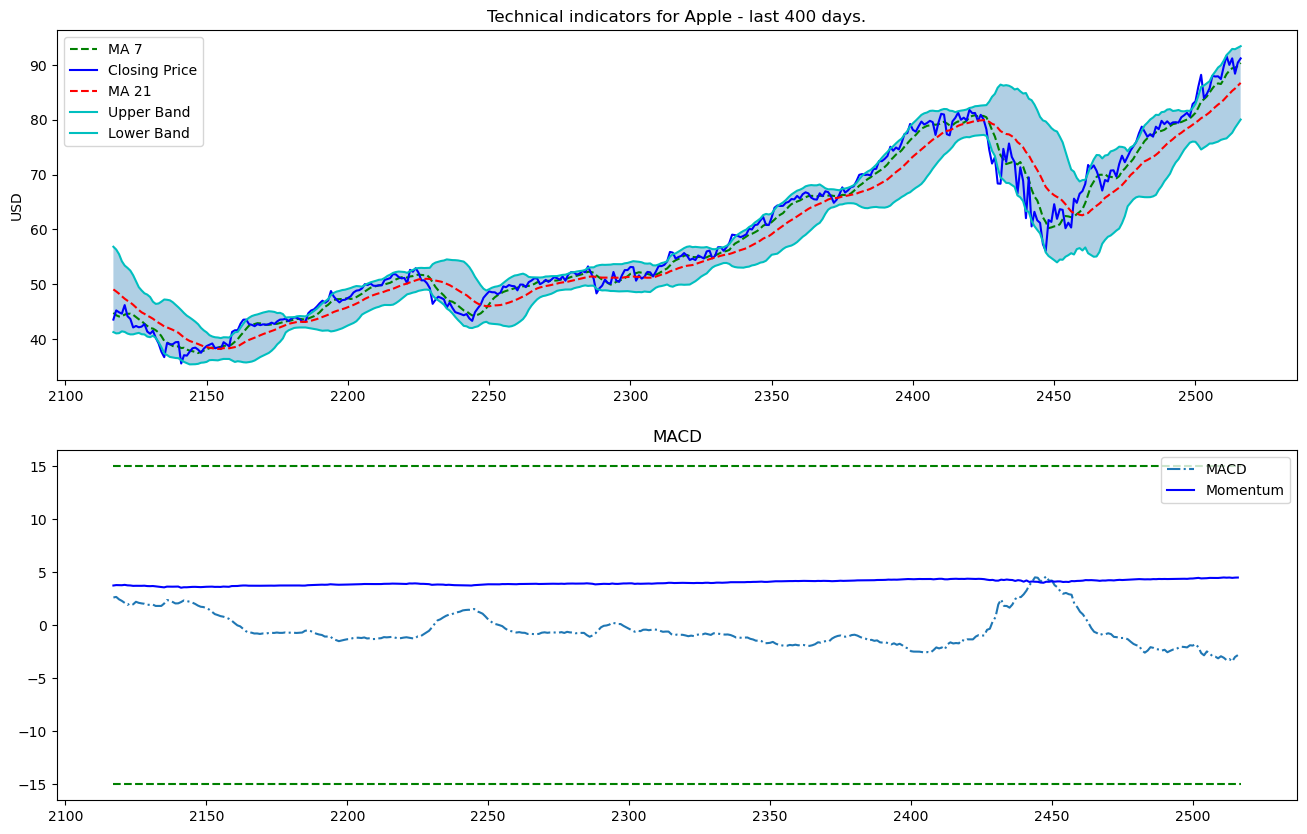

In [ ]:
plot_technical_indicators(T_df, 400)

In [ ]:
def plot_Fourier(dataset):
    data_FT = dataset[['Date', 'Close']]

    close_fft = np.fft.fft(np.asarray(data_FT['Close'].tolist()))
    fft_df = pd.DataFrame({'fft': close_fft})
    fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
    fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

    fft_list = np.asarray(fft_df['fft'].tolist())
    plt.figure(figsize=(14, 7), dpi=100)
    fft_list = np.asarray(fft_df['fft'].tolist())
    for num_ in [3, 6, 9]:
        fft_list_m10 = np.copy(fft_list);
        fft_list_m10[num_:-num_] = 0
        plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
    plt.plot(data_FT['Close'], label='Real')
    plt.xlabel('Days')
    plt.ylabel('USD')
    plt.title('Apple (close) stock prices & Fourier transforms')
    plt.legend()
    plt.show()

C:\Users\nahid\anaconda3\envs\tensor\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


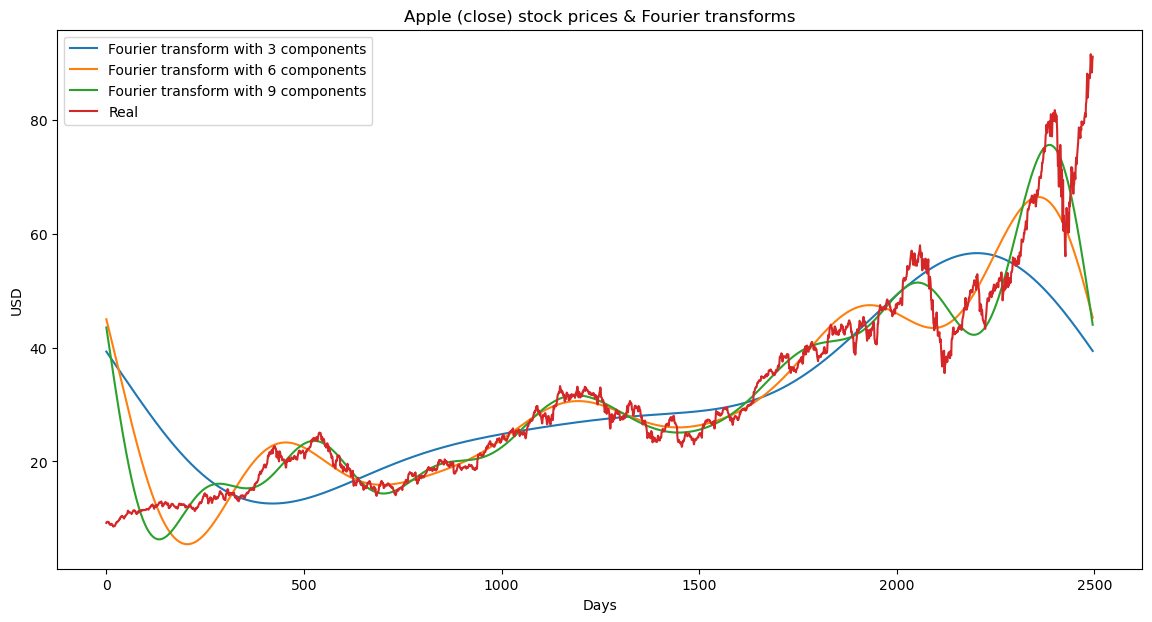

In [ ]:
plot_Fourier(dataset)

# Data Preprocessing

In [ ]:
import os
import pandas as pd
import numpy as np
import pandas as pd
import statsmodels.api as sm
from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pickle import dump

In [ ]:
dataset = pd.read_csv('Finaldata.csv', parse_dates=['Date'])
news = pd.read_csv("News.csv", parse_dates=["Date"])

In [ ]:
dataset.head()

,Date,Open,High,Low,Close,Volume,NASDAQ,NYSE,S&P 500,FTSE100,...,upper_band,lower_band,EMA,logmomentum,absolute of 3 comp,angle of 3 comp,absolute of 6 comp,angle of 6 comp,absolute of 9 comp,angle of 9 comp
0,2010-07-30,9.138928,9.275000,9.103572,9.187500,448210000,2254.699951,6998.990234,1101.599976,5258.02,...,9.471127,8.739587,9.211011,2.102609,39.394969,-0.057979,45.061101,-0.046991,43.584984,-0.024837
1,2010-08-02,9.301429,9.378214,9.272142,9.351786,428055600,2295.360107,7174.899902,1125.859985,5397.11,...,9.479903,8.776288,9.304861,2.122475,39.295065,-0.058099,44.783613,-0.047516,43.114605,-0.025025
2,2010-08-03,9.321786,9.402143,9.265000,9.354643,417653600,2283.520020,7146.990234,1120.459961,5396.48,...,9.494345,8.812832,9.338049,2.122817,39.195068,-0.058217,44.505289,-0.048036,42.644095,-0.025205
3,2010-08-04,9.387143,9.438571,9.296785,9.392143,420375200,2303.570068,7182.140137,1127.239990,5386.16,...,9.532183,8.823803,9.374112,2.127296,39.094981,-0.058333,44.226155,-0.048554,42.173551,-0.025375
4,2010-08-05,9.347500,9.399285,9.305357,9.346429,289097200,2293.060059,7174.270020,1125.810059,5365.78,...,9.545201,8.821092,9.355657,2.121834,38.994805,-0.058446,43.946237,-0.049067,41.703066,-0.025536


In [ ]:
news.head()

,Date,Score
0,2010-07-01,NaN
1,2010-07-02,0.090936
2,2010-07-06,0.052680
3,2010-07-07,-0.959830
4,2010-07-08,0.066599


In [ ]:
# Replace 0 by NA
dataset.replace(0, np.nan, inplace=True)
dataset.to_csv("dataset.csv", index=False)

In [ ]:
dataset["News"] = news["Score"]

In [ ]:
dataset.head()

,Date,Open,High,Low,Close,Volume,NASDAQ,NYSE,S&P 500,FTSE100,...,lower_band,EMA,logmomentum,absolute of 3 comp,angle of 3 comp,absolute of 6 comp,angle of 6 comp,absolute of 9 comp,angle of 9 comp,News
0,2010-07-30,9.138928,9.275000,9.103572,9.187500,448210000,2254.699951,6998.990234,1101.599976,5258.02,...,8.739587,9.211011,2.102609,39.394969,-0.057979,45.061101,-0.046991,43.584984,-0.024837,NaN
1,2010-08-02,9.301429,9.378214,9.272142,9.351786,428055600,2295.360107,7174.899902,1125.859985,5397.11,...,8.776288,9.304861,2.122475,39.295065,-0.058099,44.783613,-0.047516,43.114605,-0.025025,0.090936
2,2010-08-03,9.321786,9.402143,9.265000,9.354643,417653600,2283.520020,7146.990234,1120.459961,5396.48,...,8.812832,9.338049,2.122817,39.195068,-0.058217,44.505289,-0.048036,42.644095,-0.025205,0.052680
3,2010-08-04,9.387143,9.438571,9.296785,9.392143,420375200,2303.570068,7182.140137,1127.239990,5386.16,...,8.823803,9.374112,2.127296,39.094981,-0.058333,44.226155,-0.048554,42.173551,-0.025375,-0.959830
4,2010-08-05,9.347500,9.399285,9.305357,9.346429,289097200,2293.060059,7174.270020,1125.810059,5365.78,...,8.821092,9.355657,2.121834,38.994805,-0.058446,43.946237,-0.049067,41.703066,-0.025536,0.066599


In [ ]:
# Check NA and fill them
dataset.isnull().sum()
dataset.iloc[:, 1:] = pd.concat([dataset.iloc[:, 1:].ffill(), dataset.iloc[:, 1:].bfill()]).groupby(level=0).mean()
dataset.columns

C:\Users\nahid\AppData\Local\Temp\ipykernel_19992\3629572821.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataset.iloc[:, 1:] = pd.concat([dataset.iloc[:, 1:].ffill(), dataset.iloc[:, 1:].bfill()]).groupby(level=0).mean()


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'NASDAQ ', 'NYSE ',
       'S&P 500', 'FTSE100', 'NIKKI225', 'BSE SENSEX', 'RUSSELL2000',
       'HENG SENG', 'SSE', 'Crude Oil', 'Gold', 'VIX', 'USD index', 'Amazon',
       'Google', 'Microsoft', 'MA7', 'MA21', 'MACD', '20SD', 'upper_band',
       'lower_band', 'EMA', 'logmomentum', 'absolute of 3 comp',
       'angle of 3 comp', 'absolute of 6 comp', 'angle of 6 comp',
       'absolute of 9 comp', 'angle of 9 comp', 'News'],
      dtype='object')

In [ ]:
dataset.head()

,Date,Open,High,Low,Close,Volume,NASDAQ,NYSE,S&P 500,FTSE100,...,lower_band,EMA,logmomentum,absolute of 3 comp,angle of 3 comp,absolute of 6 comp,angle of 6 comp,absolute of 9 comp,angle of 9 comp,News
0,2010-07-30,9.138928,9.275000,9.103572,9.187500,448210000.0,2254.699951,6998.990234,1101.599976,5258.02,...,8.739587,9.211011,2.102609,39.394969,-0.057979,45.061101,-0.046991,43.584984,-0.024837,0.090936
1,2010-08-02,9.301429,9.378214,9.272142,9.351786,428055600.0,2295.360107,7174.899902,1125.859985,5397.11,...,8.776288,9.304861,2.122475,39.295065,-0.058099,44.783613,-0.047516,43.114605,-0.025025,0.090936
2,2010-08-03,9.321786,9.402143,9.265000,9.354643,417653600.0,2283.520020,7146.990234,1120.459961,5396.48,...,8.812832,9.338049,2.122817,39.195068,-0.058217,44.505289,-0.048036,42.644095,-0.025205,0.052680
3,2010-08-04,9.387143,9.438571,9.296785,9.392143,420375200.0,2303.570068,7182.140137,1127.239990,5386.16,...,8.823803,9.374112,2.127296,39.094981,-0.058333,44.226155,-0.048554,42.173551,-0.025375,-0.959830
4,2010-08-05,9.347500,9.399285,9.305357,9.346429,289097200.0,2293.060059,7174.270020,1125.810059,5365.78,...,8.821092,9.355657,2.121834,38.994805,-0.058446,43.946237,-0.049067,41.703066,-0.025536,0.066599


In [ ]:
# Set the date to datetime data
datetime_series = pd.to_datetime(dataset['Date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
dataset = dataset.set_index(datetime_index)
dataset = dataset.sort_values(by='Date')
dataset = dataset.drop(columns='Date')

In [ ]:
datetime_series.head()

0   2010-07-30
1   2010-08-02
2   2010-08-03
3   2010-08-04
4   2010-08-05
Name: Date, dtype: datetime64[ns]

In [ ]:
datetime_index[:5]

DatetimeIndex(['2010-07-30', '2010-08-02', '2010-08-03', '2010-08-04',
               '2010-08-05'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
dataset.head()

,Open,High,Low,Close,Volume,NASDAQ,NYSE,S&P 500,FTSE100,NIKKI225,...,lower_band,EMA,logmomentum,absolute of 3 comp,angle of 3 comp,absolute of 6 comp,angle of 6 comp,absolute of 9 comp,angle of 9 comp,News
2010-07-30,9.138928,9.275000,9.103572,9.187500,448210000.0,2254.699951,6998.990234,1101.599976,5258.02,9537.299805,...,8.739587,9.211011,2.102609,39.394969,-0.057979,45.061101,-0.046991,43.584984,-0.024837,0.090936
2010-08-02,9.301429,9.378214,9.272142,9.351786,428055600.0,2295.360107,7174.899902,1125.859985,5397.11,9570.309570,...,8.776288,9.304861,2.122475,39.295065,-0.058099,44.783613,-0.047516,43.114605,-0.025025,0.090936
2010-08-03,9.321786,9.402143,9.265000,9.354643,417653600.0,2283.520020,7146.990234,1120.459961,5396.48,9694.009766,...,8.812832,9.338049,2.122817,39.195068,-0.058217,44.505289,-0.048036,42.644095,-0.025205,0.052680
2010-08-04,9.387143,9.438571,9.296785,9.392143,420375200.0,2303.570068,7182.140137,1127.239990,5386.16,9489.339844,...,8.823803,9.374112,2.127296,39.094981,-0.058333,44.226155,-0.048554,42.173551,-0.025375,-0.959830
2010-08-05,9.347500,9.399285,9.305357,9.346429,289097200.0,2293.060059,7174.270020,1125.810059,5365.78,9653.919922,...,8.821092,9.355657,2.121834,38.994805,-0.058446,43.946237,-0.049067,41.703066,-0.025536,0.066599


In [ ]:
# Get features and target
X_value = pd.DataFrame(dataset.iloc[:, :])
y_value = pd.DataFrame(dataset.iloc[:, 3]) #close value

In [ ]:
y_value

,Close
2010-07-30,9.187500
2010-08-02,9.351786
2010-08-03,9.354643
2010-08-04,9.392143
2010-08-05,9.346429
...,...
2020-06-24,90.014999
2020-06-25,91.209999
2020-06-26,88.407501
2020-06-29,90.445000


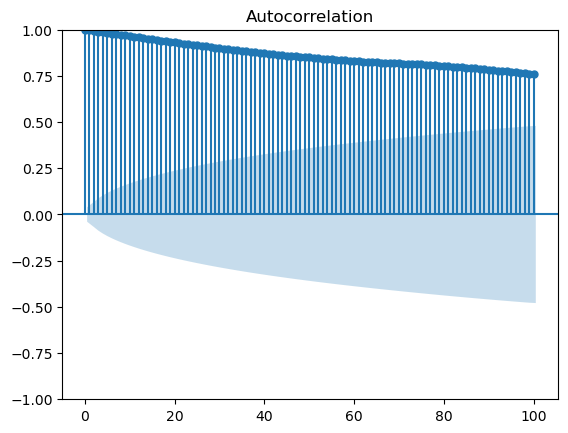

In [ ]:
# Autocorrelation Check
sm.graphics.tsa.plot_acf(y_value.squeeze(), lags=100)
plt.show()

In [ ]:
X_scaler = MinMaxScaler(feature_range=(-1, 1))
y_scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaler.fit(X_value)
y_scaler.fit(y_value)

MinMaxScaler(feature_range=(-1, 1))

In [ ]:
X_scale_dataset = X_scaler.fit_transform(X_value)
y_scale_dataset = y_scaler.fit_transform(y_value)

In [ ]:
y_value

,Close
2010-07-30,9.187500
2010-08-02,9.351786
2010-08-03,9.354643
2010-08-04,9.392143
2010-08-05,9.346429
...,...
2020-06-24,90.014999
2020-06-25,91.209999
2020-06-26,88.407501
2020-06-29,90.445000


In [ ]:
y_scale_dataset

array([[-0.98510608],
       [-0.98115041],
       [-0.98108162],
       ...,
       [ 0.92234866],
       [ 0.97140744],
       [ 0.98958622]])

In [ ]:
dump(X_scaler, open('X_scaler.pkl', 'wb'))
dump(y_scaler, open('y_scaler.pkl', 'wb'))

In [ ]:
X_value.shape

(2497, 36)

In [ ]:
# Reshape the data
'''Set the data input steps and output steps,
    we use 30 days data to predict 1 day price here,
    reshape it to (None, input_step, number of features) used for LSTM input'''
n_steps_in = 3
n_features = X_value.shape[1]
n_steps_out = 1

In [ ]:
print(X_scale_dataset.shape)
print(y_scale_dataset.shape)

(2497, 36)
(2497, 1)


In [ ]:
y_scale_dataset[3:4][:, :]

array([[-0.9801787]])

In [ ]:
def get_X_y(X_data, y_data):
    X = list()
    y = list()
    yc = list()

    length = len(X_data)
    for i in range(0, length, 1):
        X_value = X_data[i: i + n_steps_in][:, :]
        y_value = y_data[i + n_steps_in: i + (n_steps_in + n_steps_out)][:, 0]
        yc_value = y_data[i: i + n_steps_in][:, :]
        if len(X_value) == 3 and len(y_value) == 1:
            X.append(X_value)
            y.append(y_value)
            yc.append(yc_value)

    return np.array(X), np.array(y), np.array(yc)

In [ ]:
# get the train test predict index
def predict_index(dataset, X_train, n_steps_in, n_steps_out):

    # get the predict data (remove the in_steps days)
    train_predict_index = dataset.iloc[n_steps_in : X_train.shape[0] + n_steps_in + n_steps_out - 1, :].index
    test_predict_index = dataset.iloc[X_train.shape[0] + n_steps_in:, :].index

    return train_predict_index, test_predict_index

In [ ]:
# Split train/test dataset
def split_train_test(data):
    train_size = round(len(X) * 0.7)
    data_train = data[0:train_size]
    data_test = data[train_size:]
    return data_train, data_test

In [ ]:
X, y, yc = get_X_y(X_scale_dataset, y_scale_dataset)
X_train, X_test, = split_train_test(X)
y_train, y_test, = split_train_test(y)
yc_train, yc_test, = split_train_test(yc)
index_train, index_test, = predict_index(dataset, X_train, n_steps_in, n_steps_out) #dataset=original updated data

In [ ]:
print('X shape: ', X.shape)
print('y shape: ', y.shape)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('y_c_train shape: ', yc_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
print('y_c_test shape: ', yc_test.shape)
print('index_train shape:', index_train.shape)
print('index_test shape:', index_test.shape)

np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)
np.save("yc_train.npy", yc_train)
np.save("yc_test.npy", yc_test)
np.save('index_train.npy', index_train)
np.save('index_test.npy', index_test)

X shape:  (2494, 3, 36)
y shape:  (2494, 1)
X_train shape:  (1746, 3, 36)
y_train shape:  (1746, 1)
y_c_train shape:  (1746, 3, 1)
X_test shape:  (748, 3, 36)
y_test shape:  (748, 1)
y_c_test shape:  (748, 3, 1)
index_train shape: (1746,)
index_test shape: (748,)


# GRU Model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Dropout, Bidirectional
from tensorflow.keras.layers import BatchNormalization, Embedding, TimeDistributed, LeakyReLU
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot
from pickle import load

In [ ]:
# Load data
X_train = np.load("X_train.npy", allow_pickle=True)
y_train = np.load("y_train.npy", allow_pickle=True)
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)
yc_train = np.load("yc_train.npy", allow_pickle=True)
yc_test = np.load("yc_test.npy", allow_pickle=True)

In [ ]:
# Parameters
LR = 0.0001
BATCH_SIZE = 128
N_EPOCH = 50

input_dim = X_train.shape[1]
feature_size = X_train.shape[2]
output_dim = y_train.shape[1]

In [ ]:
feature_size

36

In [ ]:
def basic_GRU(input_dim, output_dim, feature_size):
    inp = Input(shape=(input_dim, feature_size))
    x = GRU(units=128, return_sequences = True)(inp)
    x = GRU(units=64)(x)
    x = Dense(32)(x)
    op= Dense(units=output_dim)(x)
    model = Model(inputs=inp, outputs=op, name="gru_model")
    model.compile(loss='mse', optimizer = Adam(learning_rate=LR))
    return model

In [ ]:
gru = basic_GRU(input_dim, output_dim, feature_size)

In [ ]:
gru.summary()

Model: "gru_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3, 36)]           0         
                                                                 
 gru (GRU)                   (None, 3, 128)            63744     
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 103,105
Trainable params: 103,105
Non-trainable params: 0
_________________________________________________________________


In [ ]:
gru_history = gru.fit(X_train, y_train, epochs=N_EPOCH, batch_size=BATCH_SIZE, validation_data=(X_test, y_test),
                        verbose=2, shuffle=False)

Epoch 1/50
14/14 - 6s - loss: 0.5558 - val_loss: 0.0775 - 6s/epoch - 416ms/step
Epoch 2/50
14/14 - 0s - loss: 0.0604 - val_loss: 0.0414 - 93ms/epoch - 7ms/step
Epoch 3/50
14/14 - 0s - loss: 0.0109 - val_loss: 0.0310 - 99ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.0148 - val_loss: 0.0293 - 93ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.0063 - val_loss: 0.0282 - 91ms/epoch - 6ms/step
Epoch 6/50
14/14 - 0s - loss: 0.0048 - val_loss: 0.0260 - 100ms/epoch - 7ms/step
Epoch 7/50
14/14 - 0s - loss: 0.0040 - val_loss: 0.0246 - 89ms/epoch - 6ms/step
Epoch 8/50
14/14 - 0s - loss: 0.0037 - val_loss: 0.0242 - 94ms/epoch - 7ms/step
Epoch 9/50
14/14 - 0s - loss: 0.0033 - val_loss: 0.0239 - 96ms/epoch - 7ms/step
Epoch 10/50
14/14 - 0s - loss: 0.0030 - val_loss: 0.0237 - 93ms/epoch - 7ms/step
Epoch 11/50
14/14 - 0s - loss: 0.0027 - val_loss: 0.0236 - 87ms/epoch - 6ms/step
Epoch 12/50
14/14 - 0s - loss: 0.0025 - val_loss: 0.0236 - 89ms/epoch - 6ms/step
Epoch 13/50
14/14 - 0s - loss: 0.002

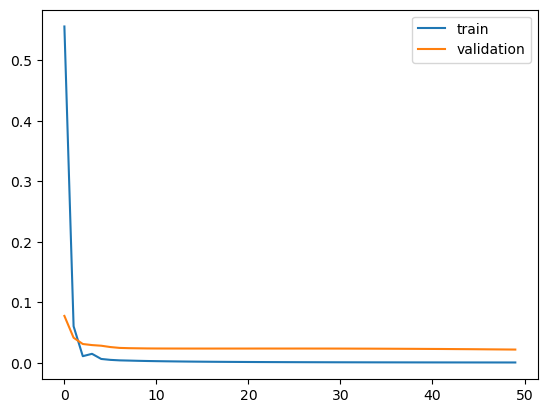

In [ ]:
plt.plot(gru_history.history['loss'], label='train')
plt.plot(gru_history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [ ]:
gru.save('gru.h5')

In [ ]:
yhat = gru.predict(X_test, verbose=0)

In [ ]:
rmse = sqrt(mean_squared_error(y_test, yhat))
print(rmse)

0.14786048226275705


In [ ]:
def plot_traindataset_result(X_train, y_train):
    train_yhat = gru.predict(X_train, verbose=1)

    y_scaler = load(open('y_scaler.pkl', 'rb'))
    train_predict_index = np.load("index_train.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_train)
    rescaled_predicted_y = y_scaler.inverse_transform(train_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=train_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=train_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Train", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis=1)
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    #print('-- Train RMSE -- ', RMSE)

    return RMSE


55/55 [==============================] - 0s 2ms/step


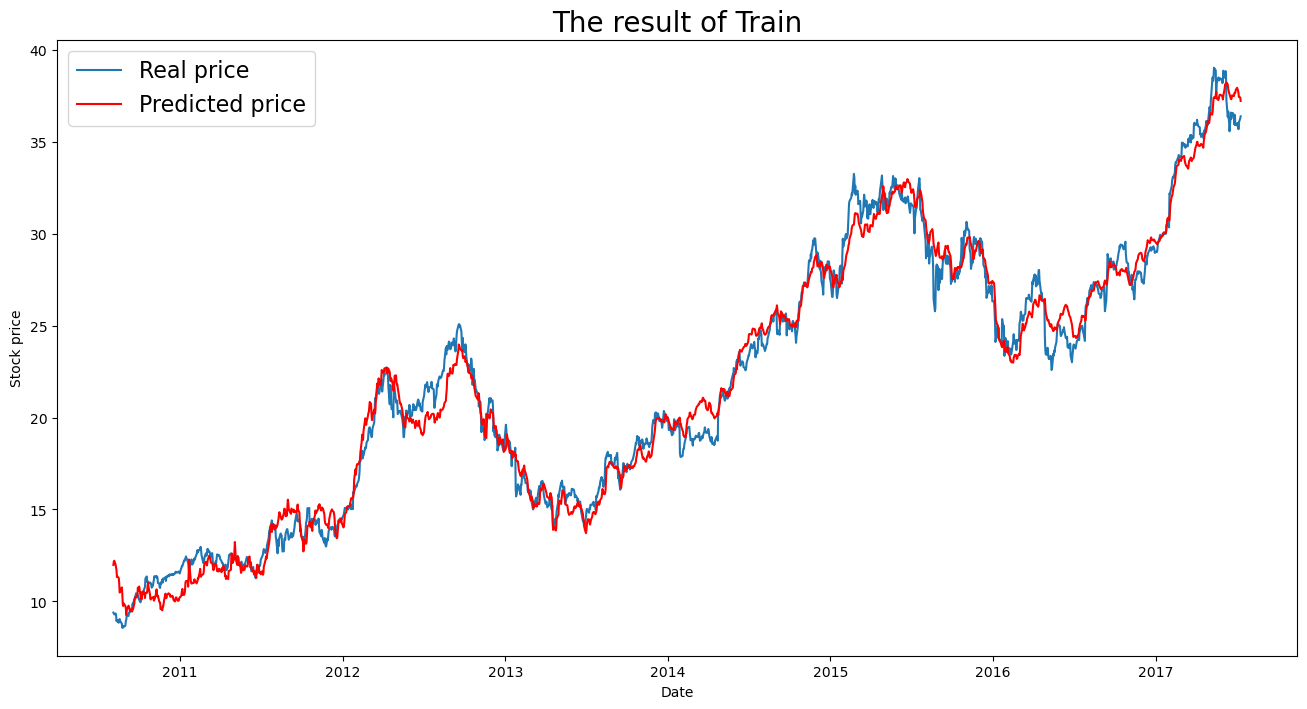

----- Train_RMSE_LSTM ----- 0.9328524520522562


In [ ]:
train_RMSE = plot_traindataset_result(X_train, y_train)
print("----- Train_RMSE_LSTM -----", train_RMSE)

In [ ]:
def plot_testdataset_result(X_test, y_test):

    test_yhat = gru.predict(X_test, verbose=1)
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    test_predict_index = np.load("index_test.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(test_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=test_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    Input_Before = '2020-01-01'
    predict_result = predict_result.loc[predict_result.index < Input_Before]
    real_price = real_price.loc[real_price.index < Input_Before]

    print(predict_result.tail(10))

    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Testing", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    #print('-- Test RMSE -- ', RMSE)

    return RMSE

24/24 [==============================] - 0s 2ms/step
            predicted_price  predicted_price  predicted_price  \
2019-12-17              NaN              NaN              NaN   
2019-12-18              NaN              NaN              NaN   
2019-12-19              NaN              NaN              NaN   
2019-12-20              NaN              NaN              NaN   
2019-12-23              NaN              NaN              NaN   
2019-12-24              NaN              NaN              NaN   
2019-12-26              NaN              NaN              NaN   
2019-12-27              NaN              NaN              NaN   
2019-12-30              NaN              NaN              NaN   
2019-12-31              NaN              NaN              NaN   

            predicted_price  predicted_price  predicted_price  \
2019-12-17              NaN              NaN              NaN   
2019-12-18              NaN              NaN              NaN   
2019-12-19              NaN         

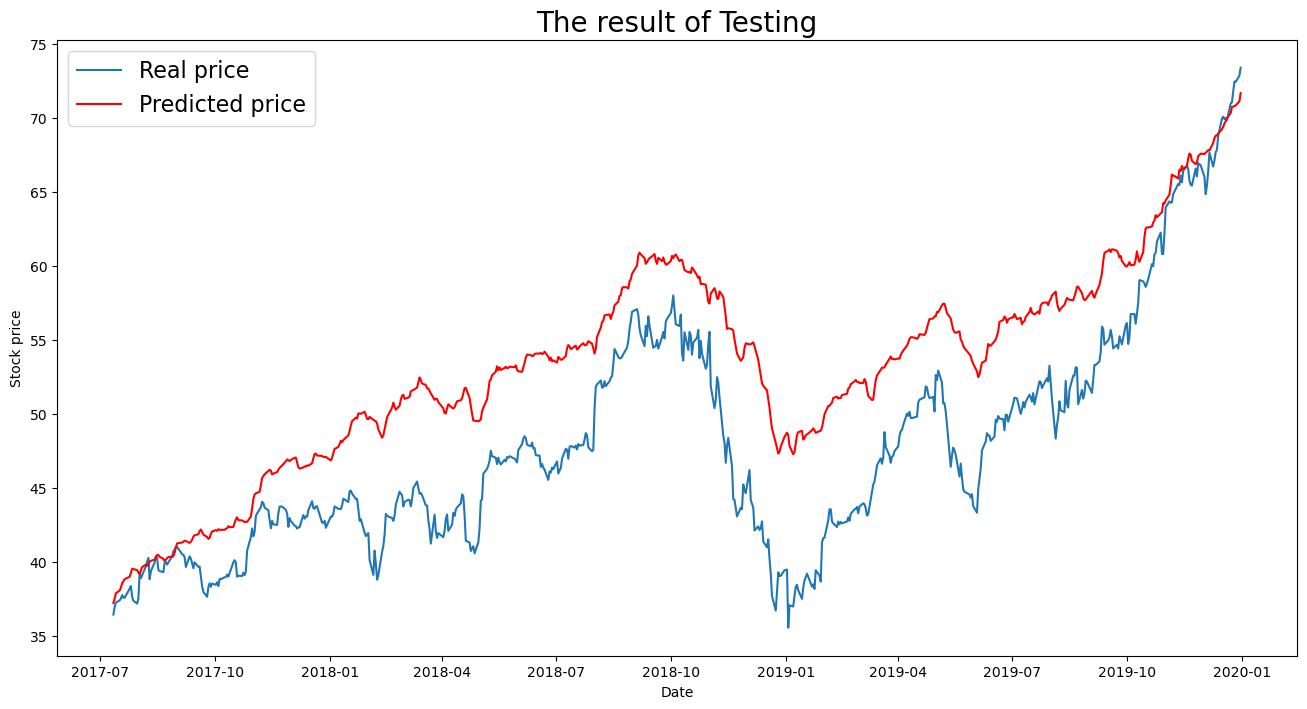

----- Test_RMSE_LSTM ----- 6.066012773729911


In [ ]:
test_RMSE = plot_testdataset_result(X_test, y_test)
print("----- Test_RMSE_LSTM -----", test_RMSE)

In [ ]:
def plot_testdataset_with2020_result(X_test, y_test):


    test_yhat = gru.predict(X_test, 1, verbose=1)

    y_scaler = load(open('y_scaler.pkl', 'rb'))
    test_predict_index = np.load("index_test.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(test_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=test_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Testing with 2020", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    #print('-- Test RMSE with 2020 -- ', RMSE)

    return RMSE

748/748 [==============================] - 1s 2ms/step


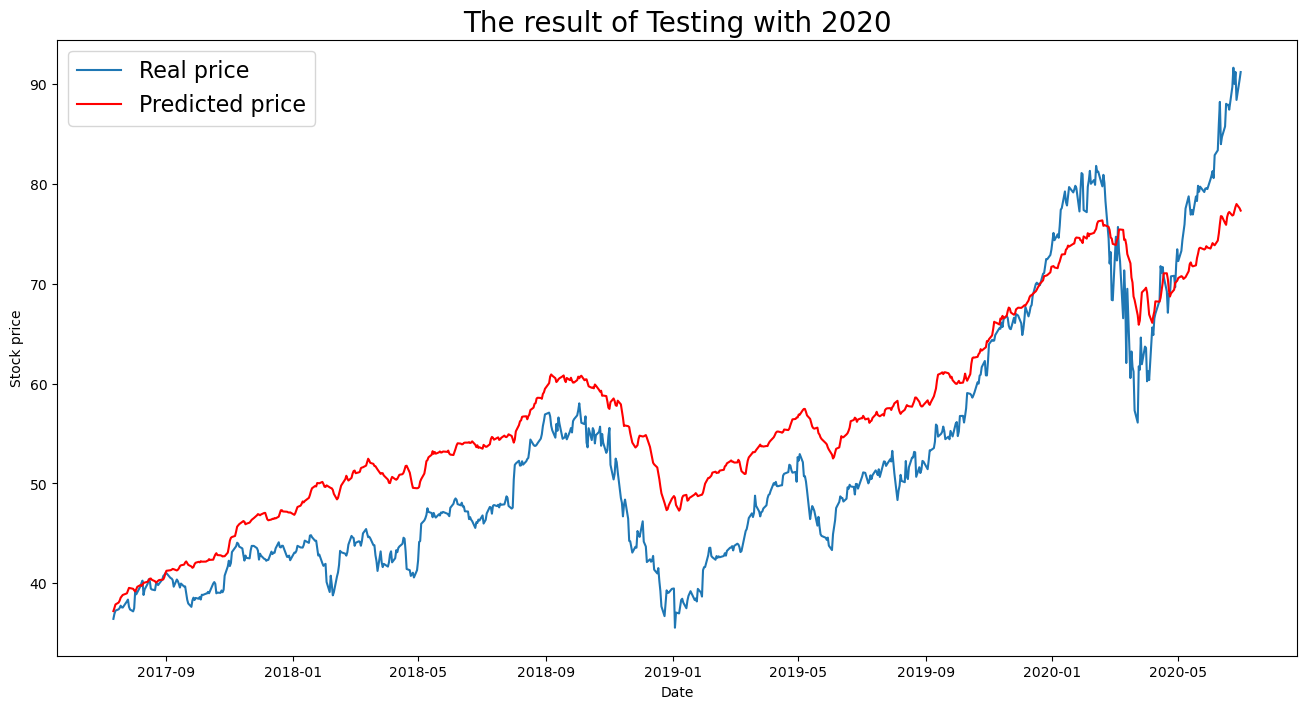

----- Test_RMSE_LSTM_with2020 ----- 6.140909878586627


In [ ]:
test_with2020_RMSE = plot_testdataset_with2020_result(X_test, y_test)
print("----- Test_RMSE_LSTM_with2020 -----", test_with2020_RMSE)

# GAN Model

In [ ]:
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
#from main.feature import get_all_features
from tensorflow.keras.layers import *
from keras.models import Model, load_model
from pickle import load
from sklearn.metrics import mean_squared_error

In [ ]:
def viz_all(model):
    return tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
X_train = np.load("X_train.npy", allow_pickle=True)
y_train = np.load("y_train.npy", allow_pickle=True)
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)
yc_train = np.load("yc_train.npy", allow_pickle=True)
yc_test = np.load("yc_test.npy", allow_pickle=True)

In [ ]:
'''def make_generator_model(input_dim, output_dim, feature_size):

    inp = Input(shape=(input_dim, feature_size), name='generator_input')
    x = LSTM(units=1024, return_sequences = True, recurrent_dropout=0.2)(inp)
    x = GRU(units=512, return_sequences = True, recurrent_dropout=0.2)(x)
    x = GRU(units=256, recurrent_dropout=0.2)(x)
    x = Dense(128)(x)
    x = Dense(64)(x)
    op= Dense(units=output_dim)(x)
    model = Model(inp, op, name="generator_model")
    #model.compile(loss='mse', optimizer = Adam(learning_rate=LR))
    return model

def make_discriminator_model():

    inp = Input(shape=(4,1), name='discriminator_input')
    x = Conv1D(32, kernel_size=3, strides = 2, padding='same', activation=LeakyReLU(alpha=0.01))(inp)
    x = Conv1D(64, kernel_size=5, strides = 2, padding='same', activation=LeakyReLU(alpha=0.01))(x)
    x = Conv1D(128, kernel_size=5, strides = 2, padding='same', activation=LeakyReLU(alpha=0.01))(x)
    x = Flatten()(x)
    x = Dense(220, use_bias=False)(x)
    x = LeakyReLU()(x)
    x = Dense(220, use_bias=False, activation='relu')(x)
    op = Dense(1, activation='sigmoid')(x)
    model = Model(inp, op, name="discriminator_model")
    return model'''


'def make_generator_model(input_dim, output_dim, feature_size):\n    \n    inp = Input(shape=(input_dim, feature_size), name=\'generator_input\')\n    x = LSTM(units=1024, return_sequences = True, recurrent_dropout=0.2)(inp)\n    x = GRU(units=512, return_sequences = True, recurrent_dropout=0.2)(x)\n    x = GRU(units=256, recurrent_dropout=0.2)(x)\n    x = Dense(128)(x)\n    x = Dense(64)(x)\n    op= Dense(units=output_dim)(x)\n    model = Model(inp, op, name="generator_model")\n    #model.compile(loss=\'mse\', optimizer = Adam(learning_rate=LR))\n    return model\n\ndef make_discriminator_model():\n    \n    inp = Input(shape=(4,1), name=\'discriminator_input\')\n    x = Conv1D(32, kernel_size=3, strides = 2, padding=\'same\', activation=LeakyReLU(alpha=0.01))(inp)\n    x = Conv1D(64, kernel_size=5, strides = 2, padding=\'same\', activation=LeakyReLU(alpha=0.01))(x)\n    x = Conv1D(128, kernel_size=5, strides = 2, padding=\'same\', activation=LeakyReLU(alpha=0.01))(x)\n    x = Flatten

In [ ]:
"""def make_discriminator():

    inp = Input(shape=(4,1), name='discriminator_input')
    x = Conv1D(32, kernel_size=3, strides = 2, padding='same', activation=LeakyReLU(alpha=0.01))(inp)
    x = Conv1D(64, kernel_size=5, strides = 2, padding='same', activation=LeakyReLU(alpha=0.01))(x)
    x = Conv1D(128, kernel_size=5, strides = 2, padding='same', activation=LeakyReLU(alpha=0.01))(x)
    x = Flatten()(x)
    x = Dense(256, use_bias=False)(x)
    x = LeakyReLU()(x)
    x = Dense(256, use_bias=False, activation='relu')(x)
    op = Dense(1, activation='sigmoid')(x)
    model = Model(inp, op, name="discriminator_model")
    return model

def make_generator(input_dim, output_dim, feature_size):
    def st(ips, name="sub_block1"):
        x = LSTM(256, return_sequences=True, activation='tanh')(ips)
        x = GRU(128, activation='tanh')(x)
        #x = Dense(32, activation = "relu")(x)
        #x = Dense(1, activation = "relu")(x)
        return x

    def st2(ips, name="sub_block2"):
        x = LSTM(256, return_sequences=True, activation='tanh')(ips)
        x = GRU(128, activation='tanh')(x)
        #x = Dense(32, activation = "relu")(x)
        #x = Dense(1, activation = "relu")(x)
        return x

    start = Input((input_dim, feature_size), name='generator_input')
    x = Conv1D(filters=1024, kernel_size=5, strides=1, padding="causal", activation="relu")(start)
    x1 = st(x)

    x2 = st2(x)

    x = multiply([x1, x2])

    x = Dense(128, activation = "relu")(x)
    x = Dense(64, activation = "relu")(x)
    end = Dense(1, name="output")(x)
    final = Model(inputs=start, outputs=end)
    return final"""

'def make_discriminator():\n    \n    inp = Input(shape=(4,1), name=\'discriminator_input\')\n    x = Conv1D(32, kernel_size=3, strides = 2, padding=\'same\', activation=LeakyReLU(alpha=0.01))(inp)\n    x = Conv1D(64, kernel_size=5, strides = 2, padding=\'same\', activation=LeakyReLU(alpha=0.01))(x)\n    x = Conv1D(128, kernel_size=5, strides = 2, padding=\'same\', activation=LeakyReLU(alpha=0.01))(x)\n    x = Flatten()(x)\n    x = Dense(256, use_bias=False)(x)\n    x = LeakyReLU()(x)\n    x = Dense(256, use_bias=False, activation=\'relu\')(x)\n    op = Dense(1, activation=\'sigmoid\')(x)\n    model = Model(inp, op, name="discriminator_model")\n    return model\n\ndef make_generator(input_dim, output_dim, feature_size):\n    def st(ips, name="sub_block1"):\n        x = LSTM(256, return_sequences=True, activation=\'tanh\')(ips)\n        x = GRU(128, activation=\'tanh\')(x)\n        #x = Dense(32, activation = "relu")(x)\n        #x = Dense(1, activation = "relu")(x)\n        return x\n 

In [ ]:
def make_auto_discriminator():

    inp = Input(shape=(4,1), name='discriminator_input')
    x = Conv1D(32, kernel_size=3, strides = 2, padding='same', activation=LeakyReLU(alpha=0.01))(inp)
    x = Conv1D(64, kernel_size=5, strides = 2, padding='same', activation=LeakyReLU(alpha=0.01))(x)
    x = Conv1D(128, kernel_size=5, strides = 2, padding='same', activation=LeakyReLU(alpha=0.01))(x)
    x = Conv1D(256, kernel_size=5, strides = 2, padding='same', activation=LeakyReLU(alpha=0.01))(x) #
    x = Flatten()(x)
    x = Dense(400, use_bias=False)(x) #
    x = LeakyReLU()(x)
    x = Dense(256, use_bias=False, activation='relu')(x)
    #x = Dense(64, use_bias=False, activation='relu')(x)#
    op = Dense(1, activation='sigmoid')(x)
    model = Model(inp, op, name="discriminator_model")
    return model

def make_auto_generator(input_dim, output_dim, feature_size):

    st = Input((3, 36))
    x = Conv1D(filters=512, kernel_size=3, strides=1, padding="causal", activation="relu")(st)
    x = LSTM(400, return_sequences=True)(x)
    x = LSTM(150, return_sequences=True)(x)
    x = LSTM(60, return_sequences=True)(x)
    x = LSTM(8, return_sequences=False)(x)
    x = RepeatVector(input_dim)(x)
    x = GRU(8, return_sequences=True)(x)
    x = GRU(60, return_sequences=True)(x)
    x = GRU(150, return_sequences=True)(x)
    x = GRU(400, return_sequences=True)(x)
    x = Conv1D(filters=512, kernel_size=3, strides=1, padding="causal", activation="relu")(x)
    x = Flatten()(x)
    x = Dense(output_dim)(x)

    final = Model(st, x)
    return final

In [ ]:
input_dim = X_train.shape[1]
feature_size = X_train.shape[2]
output_dim = y_train.shape[1]

In [ ]:
generator = make_auto_generator(X_train.shape[1], output_dim, X_train.shape[2])
print(generator.summary())
discriminator = make_auto_discriminator()
print(discriminator.summary())

Model: "model_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_44 (InputLayer)       [(None, 3, 36)]           0         
                                                                 
 conv1d_209 (Conv1D)         (None, 3, 512)            55808     
                                                                 
 lstm_188 (LSTM)             (None, 3, 400)            1460800   
                                                                 
 lstm_189 (LSTM)             (None, 3, 150)            330600    
                                                                 
 lstm_190 (LSTM)             (None, 3, 60)             50640     
                                                                 
 lstm_191 (LSTM)             (None, 8)                 2208      
                                                                 
 repeat_vector_39 (RepeatVec  (None, 3, 8)             0  

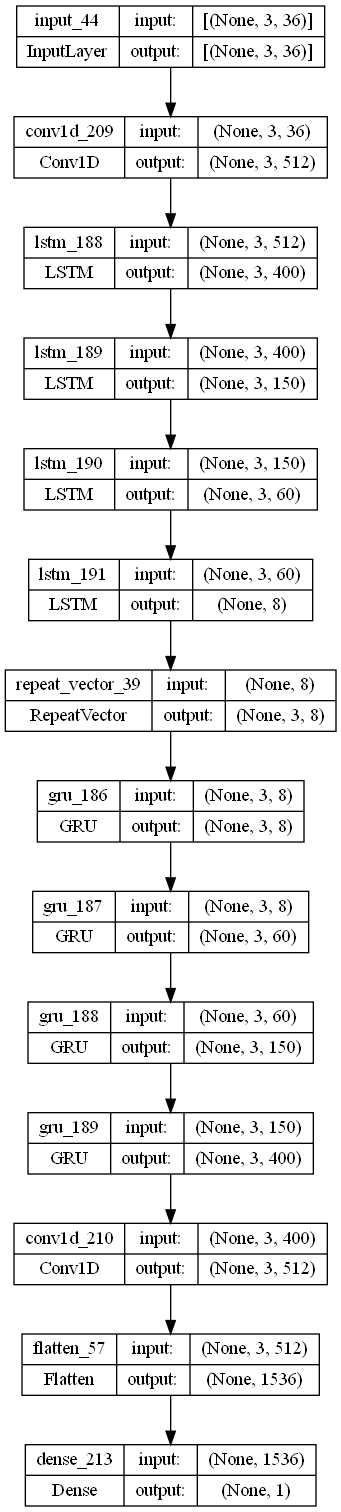

In [ ]:
viz_all(generator)

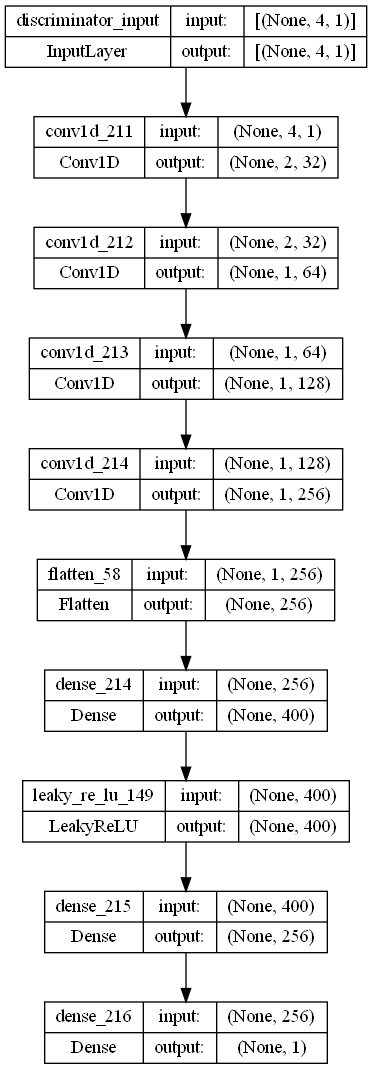

In [ ]:
viz_all(discriminator)

In [ ]:
class GAN:
    def __init__(self, generator, discriminator, opt):
        self.opt = opt
        self.lr = opt["lr"]
        self.generator = generator
        self.discriminator = discriminator
        self.cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)
        self.generator_optimizer = tf.keras.optimizers.Adam(learning_rate=self.lr)
        self.discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=self.lr)
        self.batch_size = self.opt['bs']
        self.checkpoint_dir = '../training_checkpoints'
        self.checkpoint_prefix = os.path.join(self.checkpoint_dir, "ckpt")
        self.checkpoint = tf.train.Checkpoint(generator_optimizer=self.generator_optimizer,
                                              discriminator_optimizer=self.discriminator_optimizer,
                                              generator=self.generator,
                                              discriminator=self.discriminator)

    def discriminator_loss(self, real_output, fake_output):
        real_loss = self.cross_entropy(tf.ones_like(real_output), real_output)
        fake_loss = self.cross_entropy(tf.zeros_like(fake_output), fake_output)
        total_loss = real_loss + fake_loss
        return total_loss

    def generator_loss(self, fake_output):
        return self.cross_entropy(tf.ones_like(fake_output), fake_output)

    @tf.function
    def train_step(self, real_x, real_y, yc):
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            generated_data = self.generator(real_x, training=True)
            generated_data_reshape = tf.reshape(generated_data, [generated_data.shape[0], generated_data.shape[1], 1])
            d_fake_input = tf.concat([tf.cast(generated_data_reshape, tf.float64), yc], axis=1)
            real_y_reshape = tf.reshape(real_y, [real_y.shape[0], real_y.shape[1], 1])
            d_real_input = tf.concat([real_y_reshape, yc], axis=1)

            real_output = self.discriminator(d_real_input, training=True)
            fake_output = self.discriminator(d_fake_input, training=True)

            gen_loss = self.generator_loss(fake_output)
            disc_loss = self.discriminator_loss(real_output, fake_output)

        gradients_of_generator = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)

        self.generator_optimizer.apply_gradients(zip(gradients_of_generator, self.generator.trainable_variables))
        self.discriminator_optimizer.apply_gradients(
            zip(gradients_of_discriminator, self.discriminator.trainable_variables))
        return real_y, generated_data, {'d_loss': disc_loss, 'g_loss': gen_loss}

    def train(self, real_x, real_y, yc, opt):
        train_hist = {}
        train_hist['D_losses'] = []
        train_hist['G_losses'] = []
        train_hist['per_epoch_times'] = []
        train_hist['total_ptime'] = []

        epochs = opt["epoch"]
        for epoch in range(epochs):
            start = time.time()

            real_price, fake_price, loss = self.train_step(real_x, real_y, yc)

            G_losses = []
            D_losses = []

            Real_price = []
            Predicted_price = []

            D_losses.append(loss['d_loss'].numpy())
            G_losses.append(loss['g_loss'].numpy())

            Predicted_price.append(fake_price.numpy())
            Real_price.append(real_price.numpy())

            # Save the model every 15 epochs
            if (epoch + 1) % 15 == 0:
                tf.keras.models.save_model(generator, 'gen_model_3_1_%d.h5' % epoch)
                self.checkpoint.save(file_prefix=self.checkpoint_prefix + f'-{epoch}')
                print('epoch', epoch + 1, 'd_loss', loss['d_loss'].numpy(), 'g_loss', loss['g_loss'].numpy())
            # print('Time for epoch {} is {} sec'.format(epoch + 1, time.time() - start))
            # For printing loss
            epoch_end_time = time.time()
            per_epoch_ptime = epoch_end_time - start
            train_hist['D_losses'].append(D_losses)
            train_hist['G_losses'].append(G_losses)
            train_hist['per_epoch_times'].append(per_epoch_ptime)

        # Reshape the predicted result & real
        Predicted_price = np.array(Predicted_price)
        Predicted_price = Predicted_price.reshape(Predicted_price.shape[1], Predicted_price.shape[2])
        Real_price = np.array(Real_price)
        Real_price = Real_price.reshape(Real_price.shape[1], Real_price.shape[2])

        plt.plot(train_hist['D_losses'], label='D_loss')
        plt.plot(train_hist['G_losses'], label='G_loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        return Predicted_price, Real_price, np.sqrt(mean_squared_error(Real_price, Predicted_price)) / np.mean(
            Real_price)

epoch 15 d_loss 1.3816305 g_loss 0.6941519
epoch 30 d_loss 1.3727703 g_loss 0.69722766
epoch 45 d_loss 1.3558029 g_loss 0.70386505
epoch 60 d_loss 1.3695345 g_loss 0.68839335
epoch 75 d_loss 1.4204035 g_loss 0.6275691
epoch 90 d_loss 1.4049677 g_loss 0.66172326
epoch 105 d_loss 1.3663647 g_loss 0.7135728
epoch 120 d_loss 1.3231096 g_loss 0.7454573
epoch 135 d_loss 1.2988331 g_loss 0.7513905
epoch 150 d_loss 1.4192747 g_loss 0.654277
epoch 165 d_loss 1.3601644 g_loss 0.6467613
epoch 180 d_loss 1.288504 g_loss 0.7537628
epoch 195 d_loss 1.3388351 g_loss 0.6751039
epoch 210 d_loss 1.3238761 g_loss 0.77815247
epoch 225 d_loss 1.2689472 g_loss 0.71255285
epoch 240 d_loss 1.3893344 g_loss 0.6884912
epoch 255 d_loss 1.1192286 g_loss 0.8266844
epoch 270 d_loss 1.4304023 g_loss 0.784051
epoch 285 d_loss 1.299461 g_loss 0.7144099
epoch 300 d_loss 1.205779 g_loss 0.7314918
epoch 315 d_loss 1.2217379 g_loss 0.81008244
epoch 330 d_loss 1.1992431 g_loss 0.7798738
epoch 345 d_loss 1.2628882 g_loss 0.

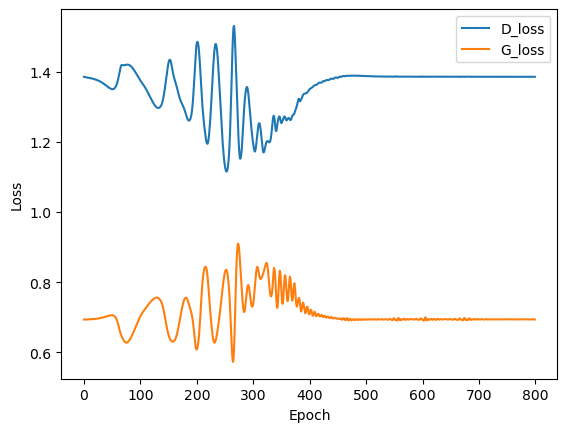

In [ ]:
if __name__ == '__main__':
    input_dim = X_train.shape[1]
    feature_size = X_train.shape[2]
    output_dim = y_train.shape[1]

    ## For Bayesian
    opt = {"lr": 0.00009, "epoch": 800, 'bs': 64}

    generator = make_auto_generator(X_train.shape[1], output_dim, X_train.shape[2])
    discriminator = make_auto_discriminator()
    gan = GAN(generator, discriminator, opt)
    Predicted_price, Real_price, RMSPE = gan.train(X_train, y_train, yc_train, opt)

In [ ]:
# Rescale back the real dataset
X_scaler = load(open('X_scaler.pkl', 'rb'))
y_scaler = load(open('y_scaler.pkl', 'rb'))
train_predict_index = np.load("index_train.npy", allow_pickle=True)
test_predict_index = np.load("index_test.npy", allow_pickle=True)
#dataset_train = pd.read_csv('dataset_train.csv', index_col=0)


print("----- predicted price -----", Predicted_price)

rescaled_Real_price = y_scaler.inverse_transform(Real_price)
rescaled_Predicted_price = y_scaler.inverse_transform(Predicted_price)

print("----- rescaled predicted price -----", rescaled_Predicted_price)
print("----- SHAPE rescaled predicted price -----", rescaled_Predicted_price.shape)

predict_result = pd.DataFrame()
for i in range(rescaled_Predicted_price.shape[0]):
    y_predict = pd.DataFrame(rescaled_Predicted_price[i], columns=["predicted_price"], index=train_predict_index[i:i+output_dim])
    predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)
#
real_price = pd.DataFrame()
for i in range(rescaled_Real_price.shape[0]):
    y_train = pd.DataFrame(rescaled_Real_price[i], columns=["real_price"], index=train_predict_index[i:i+output_dim])
    real_price = pd.concat([real_price, y_train], axis=1, sort=False)

predict_result['predicted_mean'] = predict_result.mean(axis=1)
real_price['real_mean'] = real_price.mean(axis=1)

----- predicted price ----- [[-0.99001276]
 [-0.98822063]
 [-0.9885138 ]
 ...
 [-0.3397185 ]
 [-0.34403598]
 [-0.34760654]]
----- rescaled predicted price ----- [[ 8.983717]
 [ 9.058147]
 [ 9.04597 ]
 ...
 [35.991596]
 [35.812286]
 [35.663994]]
----- SHAPE rescaled predicted price ----- (1746, 1)


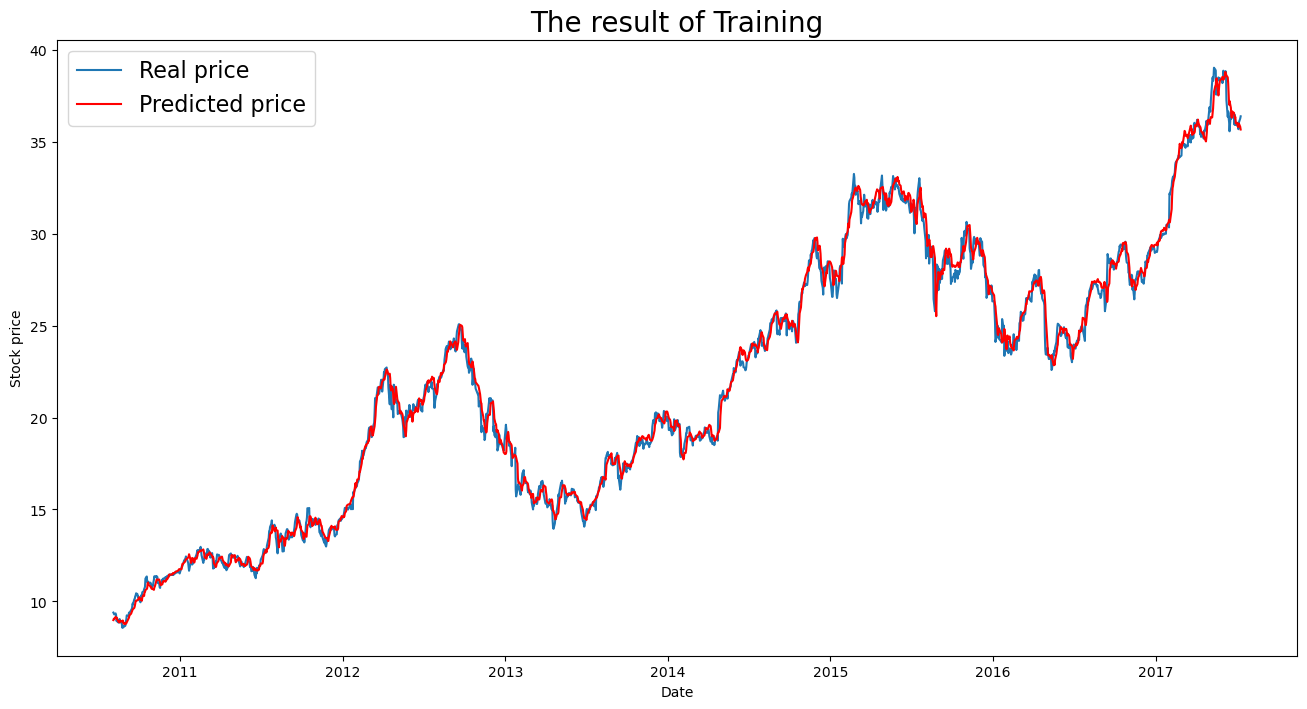

-- Train RMSE --  0.5303021149062802


In [ ]:
# Plot the predicted result
plt.figure(figsize=(16, 8))
plt.plot(real_price["real_mean"])
plt.plot(predict_result["predicted_mean"], color = 'r')
plt.xlabel("Date")
plt.ylabel("Stock price")
plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
plt.title("The result of Training", fontsize=20)
plt.show()

# Calculate RMSE
predicted = predict_result["predicted_mean"]
real = real_price["real_mean"]
For_MSE = pd.concat([predicted, real], axis = 1)
RMSE = np.sqrt(mean_squared_error(predicted, real))
print('-- Train RMSE -- ', RMSE)


# NEW GAN Approach

In [ ]:
def make_auto_discriminator():

    inp = Input(shape=(4,1), name='discriminator_input')
    x = Conv1D(32, kernel_size=3, strides = 2, padding='same', activation=LeakyReLU(alpha=0.01))(inp)
    x = Conv1D(64, kernel_size=5, strides = 2, padding='same', activation=LeakyReLU(alpha=0.01))(x)
    x = Conv1D(128, kernel_size=5, strides = 2, padding='same', activation=LeakyReLU(alpha=0.01))(x)
    x = Flatten()(x)
    x = Dense(256, use_bias=False)(x)
    x = LeakyReLU()(x)
    x = Dense(256, use_bias=False, activation='relu')(x)
    op = Dense(1, activation='sigmoid')(x)
    model = Model(inp, op, name="discriminator_model")
    return model

def make_auto_generator(input_dim, output_dim, feature_size):

    st = Input((3, 36))
    x = Conv1D(filters=512, kernel_size=5, strides=1, padding="causal", activation="relu")(st)
    x = LSTM(400, return_sequences=True)(x)
    x = LSTM(150, return_sequences=True)(x)
    x = LSTM(60, return_sequences=True)(x)
    x = LSTM(8, return_sequences=False)(x)
    x = RepeatVector(input_dim)(x)
    x = GRU(8, return_sequences=True)(x)
    x = GRU(60, return_sequences=True)(x)
    x = GRU(150, return_sequences=True)(x)
    x = GRU(400, return_sequences=True)(x)
    x = Conv1D(filters=512, kernel_size=5, strides=1, padding="causal", activation="relu")(x)
    x = Flatten()(x)
    #x = Dense(128, activation="relu")(x)
    #x = Dense(64, activation="relu")(x)
    x = Dense(1)(x)

    final = Model(st, x)
    return final

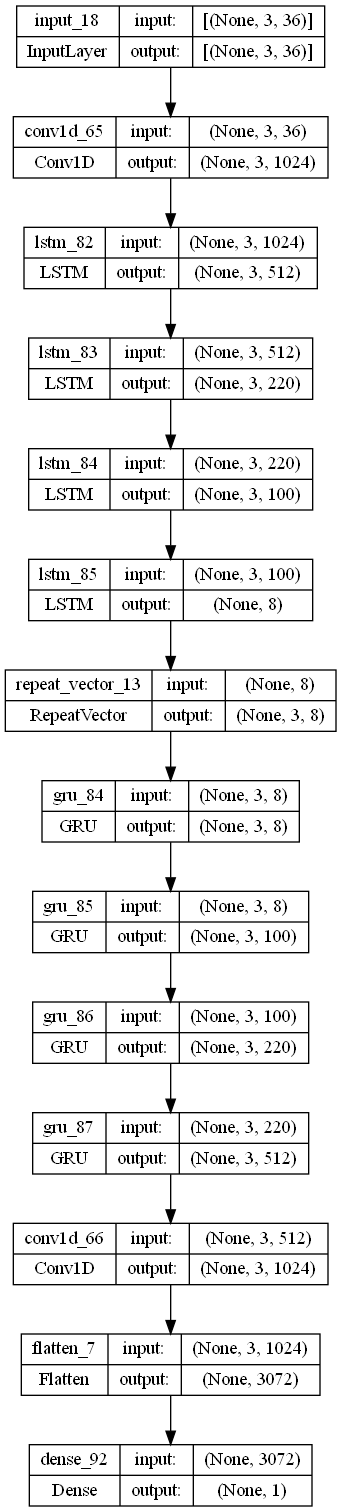

In [ ]:
agenerator = make_auto_generator(X_train.shape[1], output_dim, X_train.shape[2])
viz_all(agenerator)

In [ ]:
agenerator.summary()

Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 3, 36)]           0         
                                                                 
 conv1d_65 (Conv1D)          (None, 3, 1024)           185344    
                                                                 
 lstm_82 (LSTM)              (None, 3, 512)            3147776   
                                                                 
 lstm_83 (LSTM)              (None, 3, 220)            645040    
                                                                 
 lstm_84 (LSTM)              (None, 3, 100)            128400    
                                                                 
 lstm_85 (LSTM)              (None, 8)                 3488      
                                                                 
 repeat_vector_13 (RepeatVec  (None, 3, 8)             0  

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.GRU(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(15, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

In [ ]:
def make():

    st = Input((None, 36))
    x = Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu")(st)
    x = LSTM(64, return_sequences=True)(st)
    x = GRU(64, return_sequences=True)(x)
    x = Dense(30, activation="relu")(x)
    x = Dense(15, activation="relu")(x)
    x = Dense(1)(x)

    final = Model(st, x)
    return final

In [ ]:
def make():

    st = Input((3, 36), name='generator_input')
    #x = Conv1D(filters=1024, kernel_size=5, strides=1, padding="causal", activation="relu")(start)
    x = LSTM(256, return_sequences=True, activation='tanh')(st)
    x = GRU(128, activation='tanh')(x)
    x = GRU(128, return_sequences=True, activation='tanh')(x)


    #x = multiply([x1, x2])

    x = Dense(100, activation = "relu")(x)
    x = Dense(64, activation = "relu")(x)
    end = Dense(1, name="output")(x)
    final = Model(inputs=st, outputs=end)
    return final

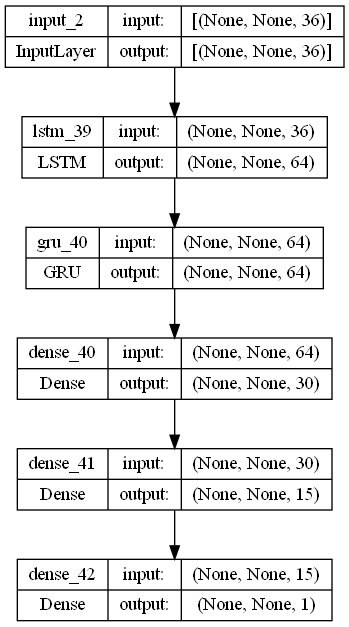

In [ ]:
testm= make()
viz_all(testm)

In [ ]:
agenerator = make_auto_generator(X_train.shape[1], output_dim, X_train.shape[2])
print(generator.summary())
adiscriminator = make_auto_discriminator()
print(discriminator.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 generator_input (InputLayer)   [(None, 3, 36)]      0           []                               
                                                                                                  
 conv1d_4 (Conv1D)              (None, 3, 1024)      185344      ['generator_input[0][0]']        
                                                                                                  
 lstm_2 (LSTM)                  (None, 3, 256)       1311744     ['conv1d_4[0][0]']               
                                                                                                  
 lstm_3 (LSTM)                  (None, 3, 256)       1311744     ['conv1d_4[0][0]']               
                                                                                            

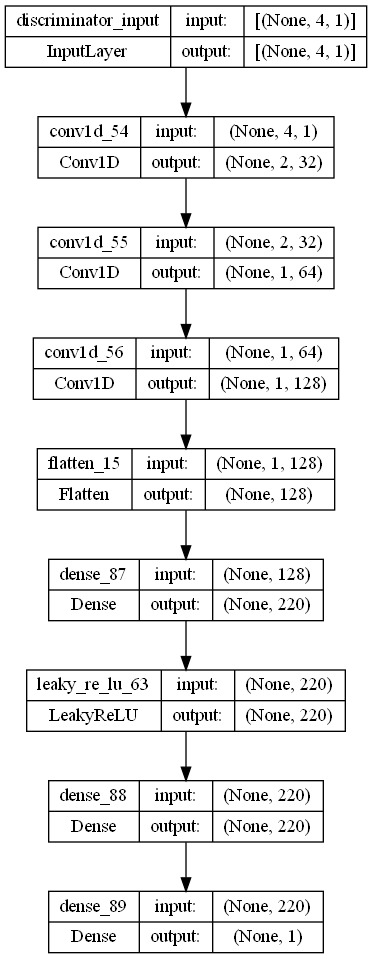

In [ ]:
viz_all(discriminator)

In [ ]:
def test_model():
    in1 = Input(shape = (10))
    in2 = Input(shape = (10))
    in3 = Input(shape = (10))
    x = multiply([in1, in2, in3])
    o1 = Dense(10, name='d1')(in1)
    o2 = Dense(10, name='d2')(in2)
    o3 = Dense(10, name='d3')(in3)
    o4 = multiply([o1, o2, o3])
    o2 = multiply([o1, o2])
    o2 = multiply([o1, o2])
    o2 = multiply([o1, o2])

    model = Model([in1,in2,in3], [o1,o2,o3, o4])
    return model

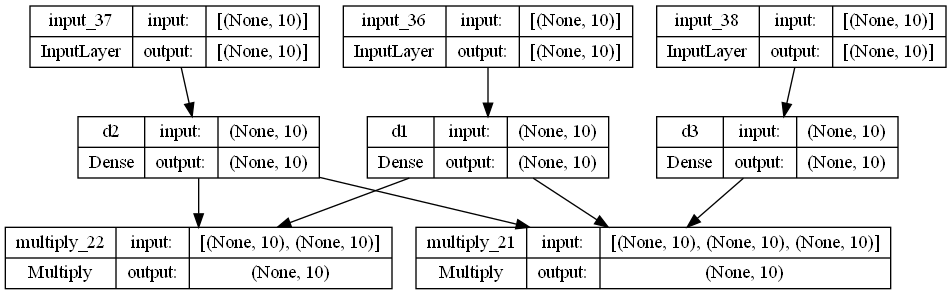

In [ ]:
test = test_model()
viz_all(test)